# Load Data

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
#Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import Dataset from Drive
# for operation 2
sample = pd.read_csv('/content/drive/MyDrive/Data Science Playground/sample.csv', na_values=['#NAME?'])
test =pd.read_csv('/content/drive/MyDrive/Data Science Playground/test.csv', na_values=['#NAME?'])
train =pd.read_csv('/content/drive/MyDrive/Data Science Playground/train.csv', na_values=['#NAME?'])
trips =pd.read_csv('/content/drive/MyDrive/Data Science Playground/trips.csv', na_values=['#NAME?'])

**Mengabaikan Warning**

In [51]:
# Terkadang warning perlu diabaikan di mana peringatan tersebut muncul secara berulang atau tidak relevan.
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [52]:
sample

,index,passenger_count
0,0,13.0
1,1,6.0
2,2,16.0
3,3,10.0
4,4,13.0
5,5,9.0


In [53]:
test

,index,pickup_datetime
0,0,2022-09-26 08:00:00+00:00
1,1,2022-09-26 09:00:00+00:00
2,2,2022-09-26 10:00:00+00:00
3,3,2022-09-26 11:00:00+00:00
4,4,2022-09-26 12:00:00+00:00
...,...,...
1571,1571,2022-11-30 19:00:00+00:00
1572,1572,2022-11-30 20:00:00+00:00
1573,1573,2022-11-30 21:00:00+00:00
1574,1574,2022-11-30 22:00:00+00:00


In [54]:
train

,pickup_datetime,passenger_count
0,2022-01-06 14:00:00+00:00,8.0
1,2022-01-06 15:00:00+00:00,3.0
2,2022-01-06 16:00:00+00:00,0.0
3,2022-01-06 17:00:00+00:00,0.0
4,2022-01-06 18:00:00+00:00,7.0
...,...,...
6301,2022-09-26 03:00:00+00:00,1.0
6302,2022-09-26 04:00:00+00:00,1.0
6303,2022-09-26 05:00:00+00:00,4.0
6304,2022-09-26 06:00:00+00:00,1.0


In [55]:
trips

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,2,2022-03-23 08:51:18.000000 UTC,2022-03-23 08:59:11.000000 UTC,1.0,0.95,1.0,N,1,7.0,0.0,0.5,2.06,0.00,0.3,0.00,12.36,262,236,2022,3
1,2,2022-03-03 10:58:28.000000 UTC,2022-03-03 11:07:36.000000 UTC,1.0,0.85,1.0,N,1,7.0,0.0,0.5,2.06,0.00,0.3,0.00,12.36,237,236,2022,3
2,2,2022-03-07 08:35:06.000000 UTC,2022-03-07 08:43:20.000000 UTC,1.0,1.08,1.0,N,1,7.0,0.0,0.5,2.06,0.00,0.3,0.00,12.36,100,170,2022,3
3,2,2022-03-12 20:53:31.000000 UTC,2022-03-12 21:02:21.000000 UTC,1.0,0.93,1.0,N,1,7.0,0.5,0.5,2.16,0.00,0.3,0.00,12.96,100,170,2022,3
4,2,2022-03-09 00:05:43.000000 UTC,2022-03-09 00:11:49.000000 UTC,2.0,1.38,1.0,N,1,7.0,0.5,0.5,2.16,0.00,0.3,0.00,12.96,163,100,2022,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54220,1,2022-03-12 02:00:03.000000 UTC,2022-03-12 02:22:35.000000 UTC,1.0,4.90,1.0,N,1,17.5,3.0,0.5,4.25,0.00,0.3,0.00,25.55,79,7,2022,3
54221,2,2022-03-21 12:05:31.000000 UTC,2022-03-21 12:33:16.000000 UTC,1.0,11.06,1.0,N,1,34.0,0.0,0.5,6.00,6.55,0.3,1.25,51.10,138,161,2022,3
54222,2,2022-03-06 19:07:37.000000 UTC,2022-03-06 19:24:46.000000 UTC,1.0,3.67,1.0,N,1,15.0,0.0,0.5,7.00,0.00,0.3,0.00,25.30,237,114,2022,3
54223,1,2022-03-24 13:00:31.000000 UTC,2022-03-24 13:22:35.000000 UTC,0.0,3.00,1.0,N,1,15.0,2.5,0.5,1.25,0.00,0.3,0.00,19.55,161,262,2022,3


In [56]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54225 entries, 0 to 54224
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vendor_id            54225 non-null  int64  
 1   pickup_datetime      54225 non-null  object 
 2   dropoff_datetime     54225 non-null  object 
 3   passenger_count      53015 non-null  float64
 4   trip_distance        54225 non-null  float64
 5   rate_code            53015 non-null  float64
 6   store_and_fwd_flag   53015 non-null  object 
 7   payment_type         54225 non-null  int64  
 8   fare_amount          54225 non-null  float64
 9   extra                54225 non-null  float64
 10  mta_tax              54225 non-null  float64
 11  tip_amount           54225 non-null  float64
 12  tolls_amount         54225 non-null  float64
 13  imp_surcharge        54225 non-null  float64
 14  airport_fee          53015 non-null  float64
 15  total_amount         54225 non-null 

In [57]:
trips.describe()

,vendor_id,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
count,54225.000000,53015.000000,54225.000000,53015.000000,54225.000000,54225.000000,54225.000000,54225.000000,54225.000000,54225.000000,54225.000000,53015.000000,54225.000000,54225.000000,54225.000000,54225.0,54225.000000
mean,1.714541,1.405414,3.942170,1.533132,1.204942,15.384128,1.014309,0.487917,2.799434,0.588710,0.295734,0.108648,22.284574,164.572964,162.089055,2022.0,6.342517
std,0.477442,0.969714,48.086847,6.561481,0.502566,14.505405,1.256638,0.096460,4.553078,2.061464,0.049964,0.354484,18.405944,65.045019,70.296662,0.0,2.863978
min,1.000000,0.000000,0.000000,1.000000,0.000000,-385.000000,-4.500000,-0.500000,-2.060000,-34.050000,-0.300000,-1.250000,-420.600000,1.000000,1.000000,2022.0,1.000000
25%,1.000000,1.000000,1.160000,1.000000,1.000000,7.000000,0.000000,0.500000,0.520000,0.000000,0.300000,0.000000,12.350000,132.000000,113.000000,2022.0,4.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,10.500000,0.500000,0.500000,2.160000,0.000000,0.300000,0.000000,16.300000,161.000000,162.000000,2022.0,7.000000
75%,2.000000,1.000000,3.800000,1.000000,1.000000,17.000000,2.500000,0.500000,3.390000,0.000000,0.300000,0.000000,23.750000,234.000000,234.000000,2022.0,9.000000
max,6.000000,8.000000,11147.540000,99.000000,4.000000,300.000000,8.250000,2.780000,733.430000,41.250000,0.300000,1.250000,748.730000,265.000000,265.000000,2022.0,11.000000


In [58]:
# Mengecek data null
trips.isna().sum().sort_values(ascending=False)

passenger_count        1210
rate_code              1210
store_and_fwd_flag     1210
airport_fee            1210
vendor_id                 0
tolls_amount              0
data_file_year            0
dropoff_location_id       0
pickup_location_id        0
total_amount              0
imp_surcharge             0
mta_tax                   0
tip_amount                0
pickup_datetime           0
extra                     0
fare_amount               0
payment_type              0
trip_distance             0
dropoff_datetime          0
data_file_month           0
dtype: int64

In [59]:
# Menghapus data kosong/null
trips.dropna(inplace=True)
trips.isna().sum()

vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
airport_fee            0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
data_file_year         0
data_file_month        0
dtype: int64

In [60]:
# Mengecek data duplikat
trips.duplicated().sum()

0

In [61]:
# Menghapus Kolom data yang tidak diperlukan
trips = trips.drop(trips.columns[[18,19]], axis=1)
pd.Index
trips.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id
0,2,2022-03-23 08:51:18.000000 UTC,2022-03-23 08:59:11.000000 UTC,1.0,0.95,1.0,N,1,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,262,236
1,2,2022-03-03 10:58:28.000000 UTC,2022-03-03 11:07:36.000000 UTC,1.0,0.85,1.0,N,1,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,237,236
2,2,2022-03-07 08:35:06.000000 UTC,2022-03-07 08:43:20.000000 UTC,1.0,1.08,1.0,N,1,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,100,170
3,2,2022-03-12 20:53:31.000000 UTC,2022-03-12 21:02:21.000000 UTC,1.0,0.93,1.0,N,1,7.0,0.5,0.5,2.16,0.0,0.3,0.0,12.96,100,170
4,2,2022-03-09 00:05:43.000000 UTC,2022-03-09 00:11:49.000000 UTC,2.0,1.38,1.0,N,1,7.0,0.5,0.5,2.16,0.0,0.3,0.0,12.96,163,100


In [62]:
# Mengubah format ke datetime
trips['pickup_datetime'] = pd.to_datetime(trips['pickup_datetime'])
trips['pickup_datetime'] = trips['pickup_datetime'].dt.tz_localize(None)
trips['dropoff_datetime'] = pd.to_datetime(trips['dropoff_datetime'])
trips['dropoff_datetime'] = trips['dropoff_datetime'].dt.tz_localize(None)

# Mengubah format
trips['passenger_count'] = trips['passenger_count'].astype(int)
trips['vendor_id'] = trips['vendor_id'].astype(str)

In [63]:
trips.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id
0,2,2022-03-23 08:51:18,2022-03-23 08:59:11,1,0.95,1.0,N,1,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,262,236
1,2,2022-03-03 10:58:28,2022-03-03 11:07:36,1,0.85,1.0,N,1,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,237,236
2,2,2022-03-07 08:35:06,2022-03-07 08:43:20,1,1.08,1.0,N,1,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,100,170
3,2,2022-03-12 20:53:31,2022-03-12 21:02:21,1,0.93,1.0,N,1,7.0,0.5,0.5,2.16,0.0,0.3,0.0,12.96,100,170
4,2,2022-03-09 00:05:43,2022-03-09 00:11:49,2,1.38,1.0,N,1,7.0,0.5,0.5,2.16,0.0,0.3,0.0,12.96,163,100


In [64]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53015 entries, 0 to 54224
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   vendor_id            53015 non-null  object        
 1   pickup_datetime      53015 non-null  datetime64[ns]
 2   dropoff_datetime     53015 non-null  datetime64[ns]
 3   passenger_count      53015 non-null  int64         
 4   trip_distance        53015 non-null  float64       
 5   rate_code            53015 non-null  float64       
 6   store_and_fwd_flag   53015 non-null  object        
 7   payment_type         53015 non-null  int64         
 8   fare_amount          53015 non-null  float64       
 9   extra                53015 non-null  float64       
 10  mta_tax              53015 non-null  float64       
 11  tip_amount           53015 non-null  float64       
 12  tolls_amount         53015 non-null  float64       
 13  imp_surcharge        53015 non-

# Exploratory Data Analysis (EDA)

### EDA Data Trips

In [65]:
correlation_matrix = trips.corr()
correlation_matrix

,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id
passenger_count,1.000000,0.033200,-0.025862,0.018604,0.037958,-0.080635,-0.001037,0.012040,0.031038,0.008453,0.025507,0.037842,-0.023190,-0.018911
trip_distance,0.033200,1.000000,0.068474,-0.003385,0.840011,0.035425,-0.028961,0.396216,0.640191,0.032727,0.648875,0.837567,-0.113017,-0.102184
rate_code,-0.025862,0.068474,1.000000,-0.033137,0.131565,-0.056746,-0.019718,-0.022404,0.082537,0.002502,-0.002795,0.096872,-0.039052,-0.037008
payment_type,0.018604,-0.003385,-0.033137,1.000000,-0.051965,-0.044138,-0.314683,-0.297989,-0.031773,-0.376485,0.017115,-0.133530,-0.024110,-0.031668
fare_amount,0.037958,0.840011,0.131565,-0.051965,1.000000,0.014952,-0.059114,0.414301,0.630109,0.149803,0.568610,0.964712,-0.100170,-0.088471
extra,-0.080635,0.035425,-0.056746,-0.044138,0.014952,1.000000,0.113144,0.034618,0.027837,0.093071,0.031249,0.044905,-0.002770,0.013516
mta_tax,-0.001037,-0.028961,-0.019718,-0.314683,-0.059114,0.113144,1.000000,-0.029144,-0.106522,0.838868,0.026352,-0.032696,0.010458,0.013548
tip_amount,0.012040,0.396216,-0.022404,-0.297989,0.414301,0.034618,-0.029144,1.000000,0.339724,0.049529,0.269293,0.618659,-0.033828,-0.022143
tolls_amount,0.031038,0.640191,0.082537,-0.031773,0.630109,0.027837,-0.106522,0.339724,1.000000,0.035531,0.460940,0.698512,-0.069225,-0.061623
imp_surcharge,0.008453,0.032727,0.002502,-0.376485,0.149803,0.093071,0.838868,0.049529,0.035531,1.000000,0.048169,0.165262,0.003183,0.000735


<Axes: >

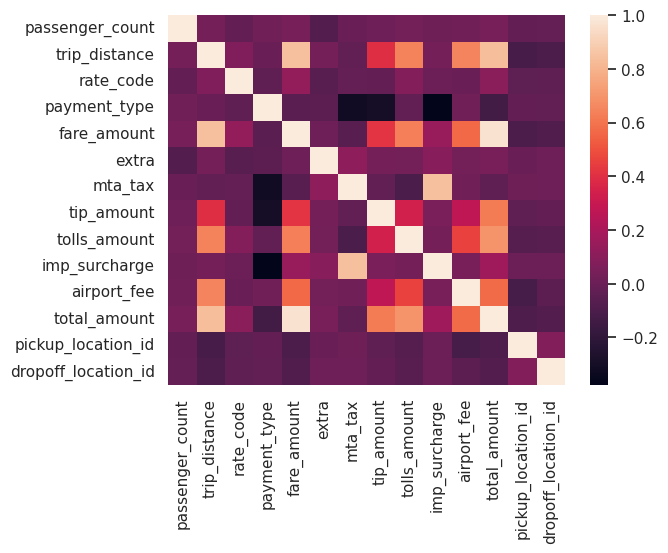

In [66]:
sns.heatmap(correlation_matrix)

**Berdasarkan hasil korelasi antar kolom, dapat disimpulkan apabila nilai korelasi lebih dari 0.5 maka hubungan antar kolom berpengaruh kuat**

---




*   Jumlah kapasitas penumpang dalam 1 mobil

In [67]:
#Jumlah Banyaknya Jumlah Penumpang
trips.passenger_count.value_counts()

1    39129
2     8107
3     2123
0     1027
4     1004
5      973
6      650
8        1
7        1
Name: passenger_count, dtype: int64

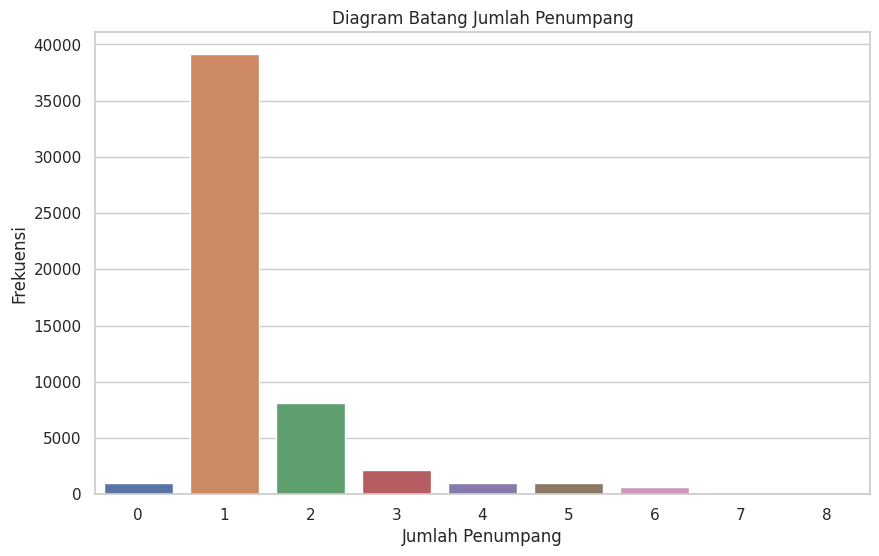

In [68]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(data=trips, x='passenger_count')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Frekuensi')
plt.title('Diagram Batang Jumlah Penumpang')
plt.show()

**Jumlah frekuensi paling banyak yaitu penumpang nya hanya berjumlah 1 orang**

*  Banyaknya Vendor yang digunakan



In [69]:
#Frekuensi Vendor
trips.vendor_id.value_counts()

2    37646
1    15369
Name: vendor_id, dtype: int64

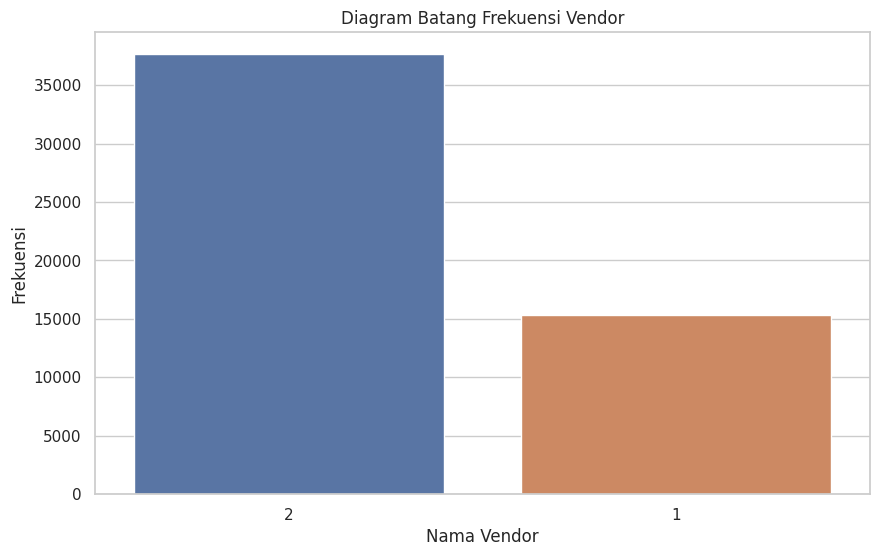

In [70]:
sns.set(style="whitegrid")  # Setel gaya plot menjadi whitegrid (opsional)
plt.figure(figsize=(10, 6))  # Setel ukuran plot (opsional)

sns.countplot(data=trips, x='vendor_id')
plt.xlabel('Nama Vendor')
plt.ylabel('Frekuensi')
plt.title('Diagram Batang Frekuensi Vendor')
plt.show()

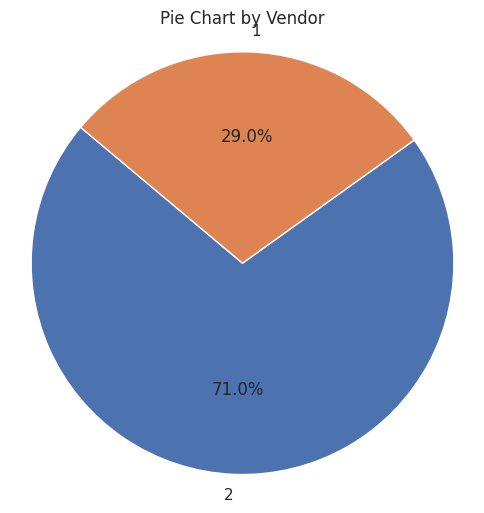

In [101]:
# Misalkan Anda memiliki DataFrame 'df' dengan kolom 'Category'
data = trips.vendor_id.value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart by Vendor')
plt.show()


**Vendor paling banyak yaitu VeriFone Inc**






* Banyaknya Tipe Pembayaran yang digunakan

In [103]:
trips.payment_type.value_counts()

1    41581
2    10876
4      331
3      227
Name: payment_type, dtype: int64

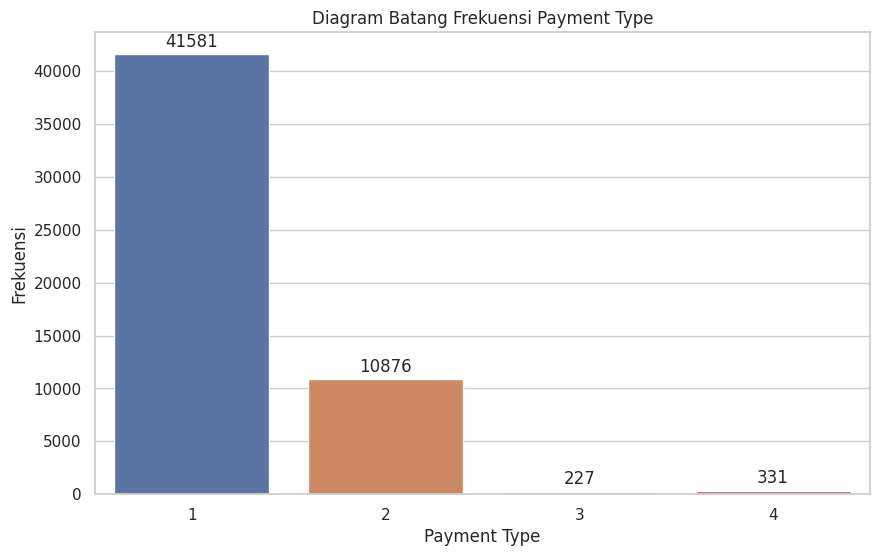

In [71]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=trips, x='payment_type')
plt.xlabel('Payment Type')
plt.ylabel('Frekuensi')
plt.title('Diagram Batang Frekuensi Payment Type')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points')
plt.show()

**Berdasarkan grafik di atas bahwa penumpang kebanyakan membayar memakai credit card dan sedikit yaitu gratis**




Mengubah type data pickup_datetime menjadi perbulan



In [72]:
trips['pickup_datetime']=trips['pickup_datetime'].dt.to_period("M")
month=trips.groupby('pickup_datetime').sum().reset_index()
month

,pickup_datetime,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id
0,2022-01,801,4519.03,5629.0,1223,16234.72,351.80,222.50,0.00,861.60,138.9,198.75,18298.27,91487,85623
1,2022-02,6227,13724.11,5647.0,5335,58136.48,4810.75,2183.50,11214.63,1732.82,1318.2,325.00,86790.88,739777,723439
2,2022-03,10037,20258.03,11498.0,8849,90273.60,7620.30,3607.00,17128.88,2233.41,2179.8,441.25,135193.69,1214319,1211615
3,2022-04,7917,16373.40,7417.0,6785,73244.44,5724.50,2743.50,13642.33,2085.62,1664.1,355.00,108409.54,920697,914278
4,2022-05,4809,17675.06,5410.0,4311,64821.50,3977.50,1726.00,11912.82,3788.40,1041.6,623.75,93420.37,571752,571066
5,2022-06,6790,15856.26,7242.0,5932,69693.50,4996.50,2373.00,13461.76,2028.56,1443.9,340.00,102102.87,804982,785546
6,2022-07,8592,26026.19,8363.0,7384,98810.21,6239.25,2883.28,18051.39,4404.83,1745.7,840.00,142365.26,959646,953388
7,2022-08,7305,17295.39,7204.0,6309,71736.51,5151.50,2477.50,12917.71,2305.50,1500.0,522.50,104723.72,827518,821303
8,2022-09,9118,25796.46,9689.0,7942,107326.36,6885.29,3167.50,19857.36,4288.60,1925.7,806.25,154592.76,1069310,1044915
9,2022-10,8156,23439.35,8824.0,7094,95018.36,6019.75,2822.50,17763.46,4136.21,1714.5,707.50,137607.28,959188,937588


In [73]:
month['pickup_datetime']=month['pickup_datetime'].dt.to_timestamp()
month

,pickup_datetime,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id
0,2022-01-01,801,4519.03,5629.0,1223,16234.72,351.80,222.50,0.00,861.60,138.9,198.75,18298.27,91487,85623
1,2022-02-01,6227,13724.11,5647.0,5335,58136.48,4810.75,2183.50,11214.63,1732.82,1318.2,325.00,86790.88,739777,723439
2,2022-03-01,10037,20258.03,11498.0,8849,90273.60,7620.30,3607.00,17128.88,2233.41,2179.8,441.25,135193.69,1214319,1211615
3,2022-04-01,7917,16373.40,7417.0,6785,73244.44,5724.50,2743.50,13642.33,2085.62,1664.1,355.00,108409.54,920697,914278
4,2022-05-01,4809,17675.06,5410.0,4311,64821.50,3977.50,1726.00,11912.82,3788.40,1041.6,623.75,93420.37,571752,571066
5,2022-06-01,6790,15856.26,7242.0,5932,69693.50,4996.50,2373.00,13461.76,2028.56,1443.9,340.00,102102.87,804982,785546
6,2022-07-01,8592,26026.19,8363.0,7384,98810.21,6239.25,2883.28,18051.39,4404.83,1745.7,840.00,142365.26,959646,953388
7,2022-08-01,7305,17295.39,7204.0,6309,71736.51,5151.50,2477.50,12917.71,2305.50,1500.0,522.50,104723.72,827518,821303
8,2022-09-01,9118,25796.46,9689.0,7942,107326.36,6885.29,3167.50,19857.36,4288.60,1925.7,806.25,154592.76,1069310,1044915
9,2022-10-01,8156,23439.35,8824.0,7094,95018.36,6019.75,2822.50,17763.46,4136.21,1714.5,707.50,137607.28,959188,937588


* Tren Jumlah Penumpang Setiap Bulan

<function matplotlib.pyplot.show(close=None, block=None)>

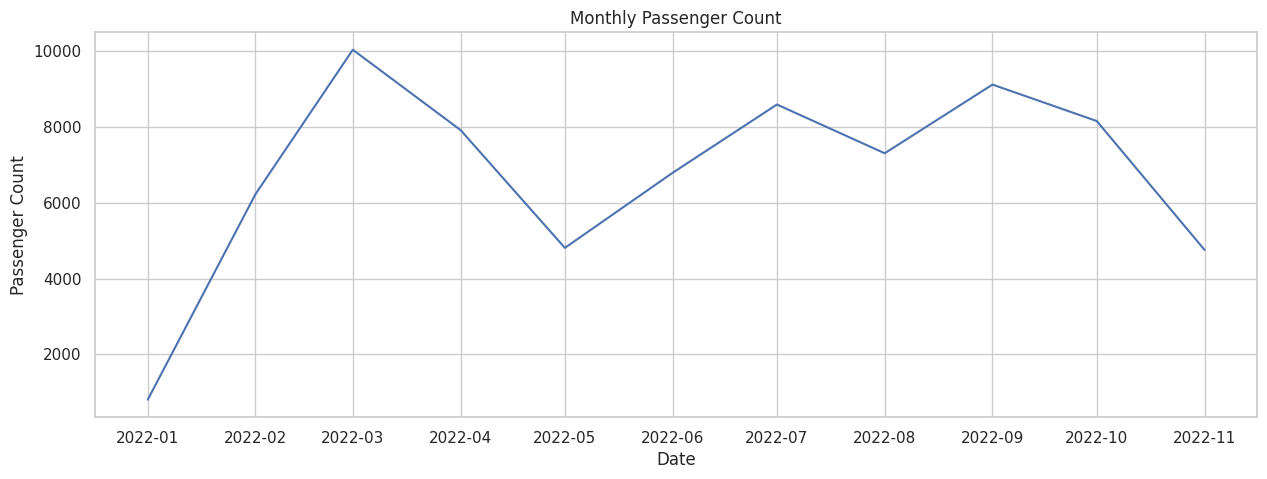

In [74]:
plt.figure(figsize=(15,5))
plt.plot(month['pickup_datetime'], month['passenger_count'])
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.title("Monthly Passenger Count")
plt.show

* Tren biaya total yang dikenakan kepada penumpang tidak termasuk tips tunai.

<function matplotlib.pyplot.show(close=None, block=None)>

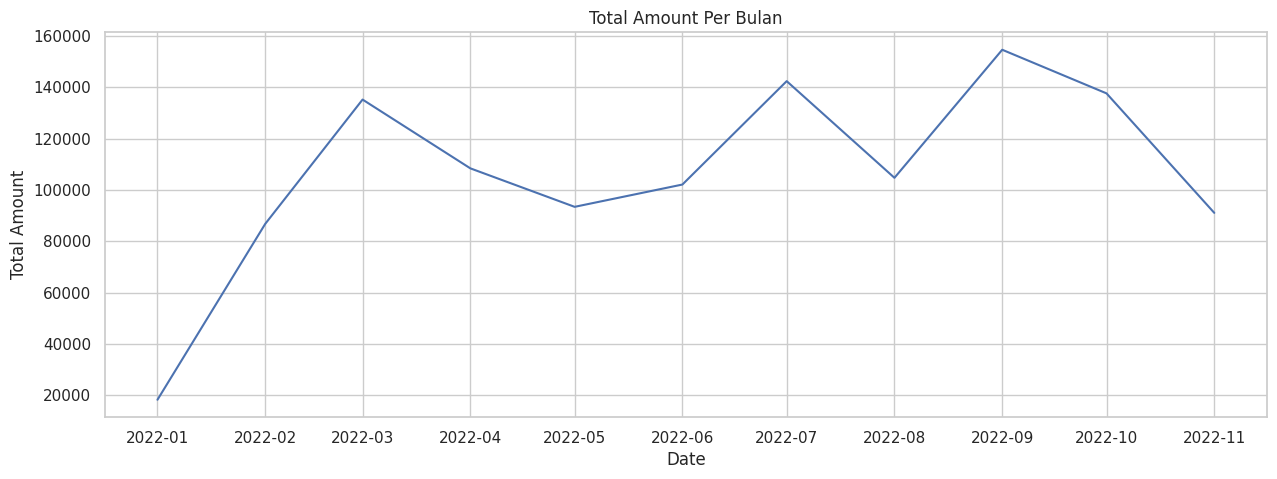

In [75]:
plt.figure(figsize=(15,5))
plt.plot(month['pickup_datetime'], month['total_amount'])
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.title("Total Amount Per Bulan")
plt.show

**Grafik di atas menunjukkan bahwa setiap bulan selama Tahun 2022 grafiknya fluktuatif/tidak stasioner**

* Tren jauhnya perjalanan setiap bulan nya

<function matplotlib.pyplot.show(close=None, block=None)>

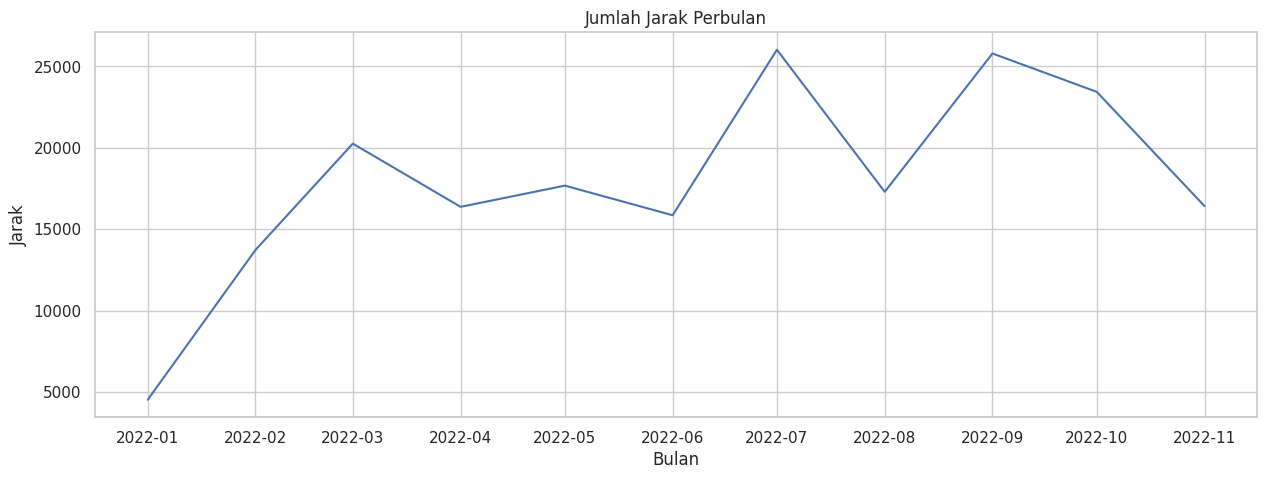

In [76]:
plt.figure(figsize=(15,5))
plt.plot(month['pickup_datetime'], month['trip_distance'])
plt.xlabel("Bulan")
plt.ylabel("Jarak")
plt.title("Jumlah Jarak Perbulan")
plt.show

**Jarak Tempuh yang paling banyak ditemepuh yaitu pada bulan Juli dan September, paling sedikit untuk taxi jarak tempuh dalam sebulan yaitu pada bulan Februari**

### EDA Data Train

In [77]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['pickup_datetime'] = train['pickup_datetime'].dt.tz_localize(None)
train['hour'] = train['pickup_datetime'].dt.hour
train.head()

,pickup_datetime,passenger_count,hour
0,2022-01-06 14:00:00,8.0,14
1,2022-01-06 15:00:00,3.0,15
2,2022-01-06 16:00:00,0.0,16
3,2022-01-06 17:00:00,0.0,17
4,2022-01-06 18:00:00,7.0,18


In [78]:
#Frekuensi Vendor
# Hitung jumlah penumpang per jam
jumlah_penumpang_per_jam = train.groupby('hour')['passenger_count'].sum()
jumlah_penumpang_per_jam

hour
0     1691.0
1     1197.0
2      764.0
3      467.0
4      269.0
5      335.0
6      854.0
7     1576.0
8     2200.0
9     2326.0
10    2845.0
11    3136.0
12    3418.0
13    3462.0
14    3786.0
15    3757.0
16    3756.0
17    4137.0
18    4210.0
19    3976.0
20    3179.0
21    3293.0
22    3069.0
23    2418.0
Name: passenger_count, dtype: float64

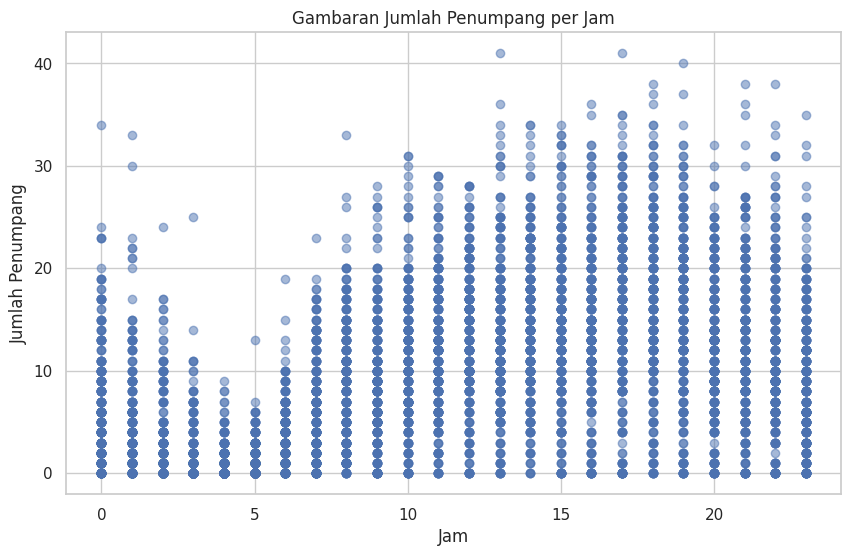

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(train['hour'], train['passenger_count'], alpha=0.5)
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.title('Gambaran Jumlah Penumpang per Jam')
plt.show()

**Berdasarkan grafik di atas, jam paling sibuk pickup penumpang yaitu sekitar jam 14-19.**

# Modelling Autoregressive Moving Average (ARIMA)

## Menguji data train apakah benar stasioner atau tidak

In [80]:
#install Arima
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.3 MB/s eta 0:00:00


In [81]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [82]:
ad_test(train['passenger_count'])

1. ADF :  -5.234425988209913
2. P-Value :  7.475326613689224e-06
3. Num Of Lags :  33
4. Num Of Observations Used For ADF Regression: 6272
5. Critical Values :
	 1% :  -3.431393045018898
	 5% :  -2.8620009336864833
	 10% :  -2.567015352019056


**Hal ini menunjukkan bahwa deret waktu tidak stasioner.**

## Memilih model ARIMA terbaik

In [83]:
from pmdarima import auto_arima
  # Mengabaikan warning
import warnings
warnings.filterwarnings("ignore")

In [84]:
stepwise_fit = auto_arima(train['passenger_count'], trace=True,
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=40417.272, Time=4.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=41860.758, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=40567.583, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=40489.765, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=41858.758, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=40418.930, Time=8.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=40431.379, Time=5.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=40401.506, Time=15.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=40425.833, Time=15.62 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=19.88 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=40403.191, Time=11.92 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=38942.976, Time=23.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=40418.957, Time=4.31 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=23.66 sec
 ARIMA(1,1,4)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6306
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -19368.923
Date:                Mon, 28 Aug 2023   AIC                          38749.847
Time:                        14:47:08   BIC                          38790.342
Sample:                             0   HQIC                         38763.874
                               - 6306                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9269      0.001   1517.606      0.000       1.924       1.929
ar.L2         -0.9945      0.001   -783.067      0.000      -0.997      -0.992
ma.L1         -2.7683      0.006   -446.467      0.000      -2.780      -2.756
ma.L2          2.6125      0.012    214.398      0.000       2.589       2.636
ma.L3         -0.8395      0.006   -134.866      0.000      -0.852      -0.827
sigma2        27.1528      0.378     71.844      0.000      26.412      27.894
===================================================================================
Ljung-Box (L1) (Q):                  36.10   Jarque-Bera (JB):               924.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction

In [85]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Tanggal-tanggal yang diberikan dengan zona waktu UTC
start_date = pd.to_datetime('2022-09-26 08:00:00+00:00')
end_date = pd.to_datetime('2022-11-30 23:00:00+00:00')
predicted_index = pd.date_range(start_date, end_date, freq='H')

# Buat DataFrame kosong untuk menyimpan prediksi
predicted_data = pd.DataFrame(index=predicted_index)

# Pilih deret waktu dari data historis
historical_data = train['passenger_count']

# Perluas indeks historis untuk mencakup rentang waktu yang ingin diprediksi
extended_index = historical_data.index.union(predicted_index)

# Reindeks ulang deret waktu historis
data_train = historical_data.reindex(extended_index)

# Fit model ARIMA ke data yang sudah diperluas indeksnya
# Gunakan model ARIMA terbaik yang telah di uji coba sebelum nya dengan p = 2, d = 1, dan q = 3
model = sm.tsa.ARIMA(data_train, order=(2, 1, 3))
results = model.fit()

# Lakukan prediksi untuk rentang waktu yang diinginkan
predictions = results.predict(start=start_date, end=end_date, dynamic=True)
predicted_data['predicted_passenger_count'] = predictions


In [86]:
# Mengambil data histori sebelumnya untuk disambungkan ke prediksi
data_histori = train[['pickup_datetime','passenger_count']]
pd.to_datetime(data_histori['pickup_datetime'])
data_histori = data_histori.set_index('pickup_datetime')

In [87]:
plt.figure(figsize=(100, 75))
plt.plot(data_histori, label='Historical Passenger Count')
plt.plot(predicted_data['predicted_passenger_count'], label='Predicted Passenger Count')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.title('Passenger Count Prediction')
plt.legend()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Hasil data Prediksi Jumlah Penumpang

In [88]:
predicted_data

,predicted_passenger_count
2022-09-26 08:00:00+00:00,6.332948
2022-09-26 09:00:00+00:00,8.171293
2022-09-26 10:00:00+00:00,10.195562
2022-09-26 11:00:00+00:00,12.267755
2022-09-26 12:00:00+00:00,14.247313
...,...
2022-11-30 19:00:00+00:00,11.208410
2022-11-30 20:00:00+00:00,11.208503
2022-11-30 21:00:00+00:00,11.198026
2022-11-30 22:00:00+00:00,11.177739


In [106]:
# Menerapkan fungsi pembulatan berdasarkan kondisi
def custom_round(x):
    if x > 0.5:
        return np.ceil(x)
    else:
        return np.floor(x)

# Menggunakan fungsi pembulatan pada kolom 'predicted_passenger_count'
predicted_data['predicted_passenger_count'] = predicted_data['predicted_passenger_count'].apply(custom_round)

In [107]:
predicted_data

,predicted_passenger_count
2022-09-26 08:00:00+00:00,7.0
2022-09-26 09:00:00+00:00,9.0
2022-09-26 10:00:00+00:00,11.0
2022-09-26 11:00:00+00:00,13.0
2022-09-26 12:00:00+00:00,15.0
...,...
2022-11-30 19:00:00+00:00,12.0
2022-11-30 20:00:00+00:00,12.0
2022-11-30 21:00:00+00:00,12.0
2022-11-30 22:00:00+00:00,12.0
